# <center>Aston University <br/><br/> CS3IVP: Image and Video Processing <br/><br/> Lab 07: Second Assessed Lab - Group 1</center>

Lecturers:<br/>
Debaleena Roy <a href="mailto:d.roy@aston.ac.uk">d.roy@aston.ac.uk</a> <br/>
Office: MB265K <br/>

Martin Rudorfer <a href="mailto:m.rudorfer@aston.ac.uk">m.rudorfer@aston.ac.uk</a> <br/>
Office: MB214G <br/>


## Instructions
Submission is required for this laboratory. Please fill in your answers and submit the completed notebook (*.ipynb file) on blackboard in the section `Assessment Submission` and `Week 7 - Assessed Lab 2`.

**You have 40 minutes to complete this assessment, that is 5 minutes before the end of your session.** 

We added some leeway for upload/submission issues, so the deadline on blackboard is a bit later. Following advice:
- make sure to submit the correct file, and
- make sure it is correctly submitted, and
- submit your work on time.

Your work will be subject to lateness penalty if submitted late. The lab has been designed so that it can be completed in 40 minutes to ensure that you have time to check your submission by the end of the session. There is a total of 20 marks per lab.

You are welcome to browse online documentation if necessary, but **you must not collaborate with others in any way**.

## Task 7.1

In this task you will work with `image1_G1.bmp`, which is corrupted by some noise. You should use **local filtering** to remove the noise and visually restore the original image.

This will be done step by step in the following sub-tasks. Please use the respective cells to provide your code to and show the intermediate results. Do not remove or add any cells.


## 7.1a

- **Load** the image from file. (1 mark)
- **Ensure** it is a numpy array with one channel per pixel and type `np.uint8` by printing out both properties and applying a conversion if necessary. (1 mark)
- **Display** the image. (1 mark)

<span style="color:#aa0000; font-family: monospace;">**[3 marks]**</span>

**Note:** 
- Make use of the given imports and do not modify the parts outside the highlighted area.


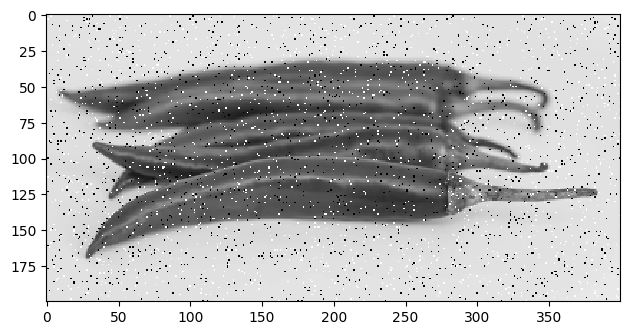

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imsave, imshow

# WRITE YOUR CODE BELOW (DO NOT DELETE THIS LINE)

image1 = imread('image1_G1.bmp')
image1 = np.array(image1, dtype=np.uint8)
imshow(image1)

# WRITE YOUR CODE ABOVE (DO NOT DELETE THIS LINE)

## 7.1b

Inspect the noise patterns in the image shown above. 

- **Choose** an *appropriate* filtering method based on your knowledge of **Lab 05: Image Filtering and Restoration**. The goal is to make the noise *visually* disappear, rather than to focus on the PSNR. (2 marks)
- **Apply** the filter to the image loaded in the previous cell and store the result in a new variable. (1 mark)
- **Tune** the parameters of the filter such that the noise completely disappears while keeping the original image as accurate as possible. (1 mark)
- **Display** the resulting image. (1 mark)

<span style="color:#aa0000; font-family: monospace;">**[5 marks]**</span>

**Notes:** 
- Import the relevant filter from the `scipy.ndimage` package. You can find a list of filters here: https://docs.scipy.org/doc/scipy/reference/ndimage.html
- Use the variables from the previous cell. Marks will be deducted if code from previous cells is duplicated.


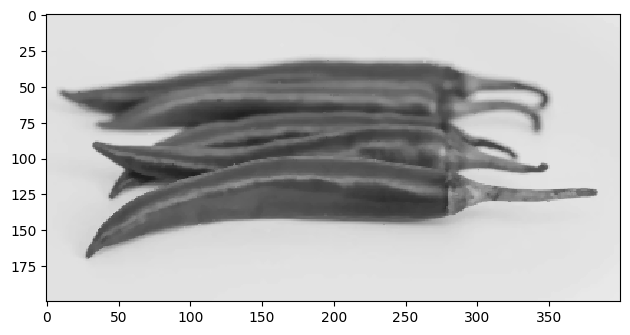

In [3]:
# WRITE YOUR CODE BELOW (DO NOT DELETE THIS LINE)

import scipy.ndimage
filtered_image = scipy.ndimage.median_filter(image1, size=3)
imshow(filtered_image)

# WRITE YOUR CODE ABOVE (DO NOT DELETE THIS LINE)

## Task 7.2

This task is focused on feature detection and combines your practise from **Lab 06** with your knowledge from **Lecture 5 - Feature Detection**.

You will work on `image2_G1.bmp` and the task is to detect a side of the triangle. To give you a better idea of the task, we show you what the desired outcome should look like. It is provided in file `image2_G1_result.bmp`.

## 7.2a

- **Load** both images from file. (1 mark)
- **Display** both images in the same cell. (1 mark)

<span style="color:#aa0000; font-family: monospace;">**[2 marks]**</span>

c:\Users\amjad\OneDrive\Desktop\Documents\University\Year 3\CS3IVP\.venv\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


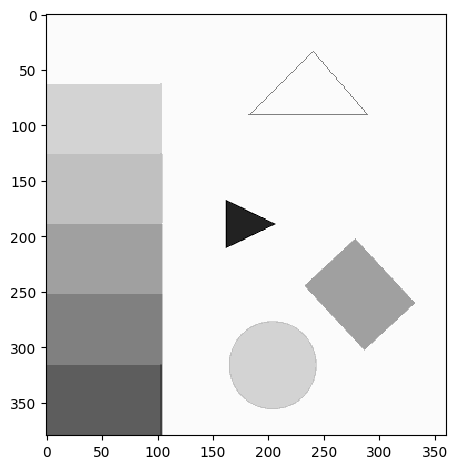

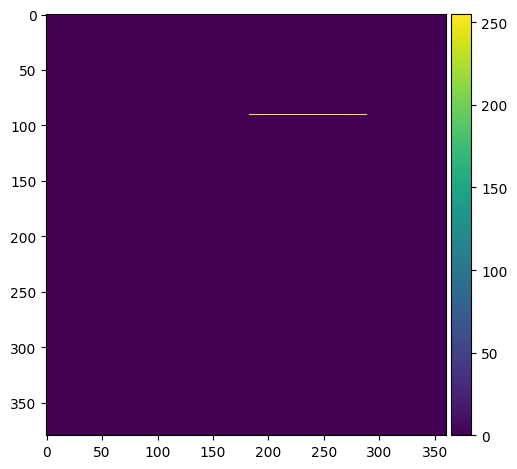

In [4]:
# WRITE YOUR CODE BELOW (DO NOT DELETE THIS LINE)

image2 = imread('image2_G1.bmp')
imshow(image2)
image2_result = imread('image2_G1_result.bmp')
plt.figure()
imshow(image2_result)

# WRITE YOUR CODE ABOVE (DO NOT DELETE THIS LINE

## 7.2b

Inspect the result image above to see which feature you need to detect.

- **Create** a filter mask that is *suitable* to detect the feature. (2 marks)
- **Convert** your image to be of data type float. (1 mark)
- **Apply** the filter mask to the image. (1 mark)
- **Scale** the result using the given function to ensure the output is an image of type `uint8`. (1 mark)
- **Display** the resulting image. (1 mark)

<span style="color:#aa0000; font-family: monospace;">**[6 marks]**</span>

**Notes:**
- Do not modify the given code and make sure to use the scaling function as given, otherwise we will deduct marks.

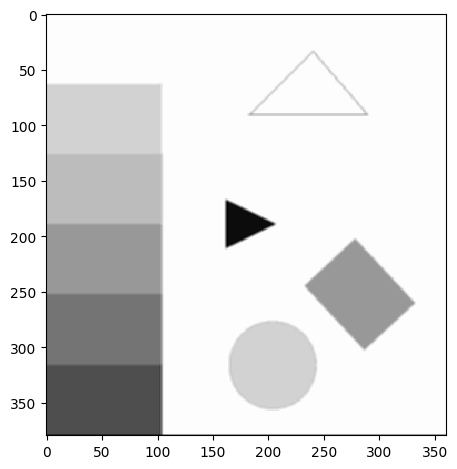

In [ ]:
from scipy.ndimage import correlate

def scale_matrix(raw_array):
    array = np.array(raw_array, dtype=float)
    ret = array-np.min(array)
    ret = ret/np.max(ret)
    ret = ret*255.
    return ret.astype(np.uint8)

    
# WRITE YOUR CODE BELOW (DO NOT DELETE THIS LINE)

filter_mask = np.array([[1, 1, 1],
                        [-2, -2, -2],
                        [1, 1, 1]])


image2 = image2.astype(float)

filtered_image2 = correlate(image2, filter_mask, mode='constant', cval=0.0)
scaled_image2 = scale_matrix(filtered_image2)
imshow(scaled_image2, cmap='gray')


# WRITE YOUR CODE ABOVE (DO NOT DELETE THIS LINE

## 7.2c

Your intermediate result from 7.2b should already highlight the feature you are seeking, but it likely also still shows other features. To isolate it, we need to further process the image.

- **Apply** a threshold to your intermediate image and store the output in a new variable. (1 mark)
- **Display** both your result of the thresholded image as well as the desired result image. (1 mark)
- **Tune** the threshold value such that only the desired feature is highlighted. If successful, your image should look exactly like the desired result image. (2 marks for an exact match, 1 mark for a close match)

<span style="color:#aa0000; font-family: monospace;">**[4 marks]**</span>

**Note:**
- To get an exact match, you may need to adjust the filter in task 7.2b. Make sure to use the code there, you will get mark deductions for duplicated code.

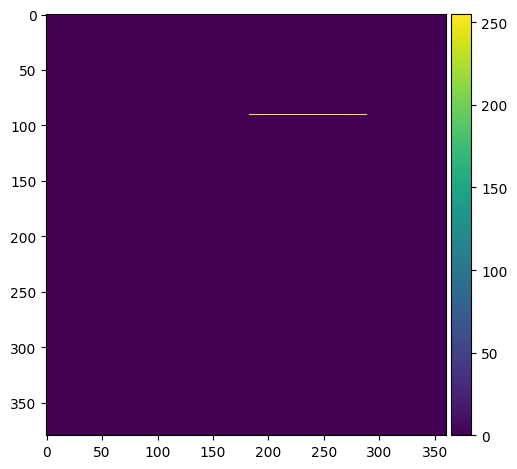

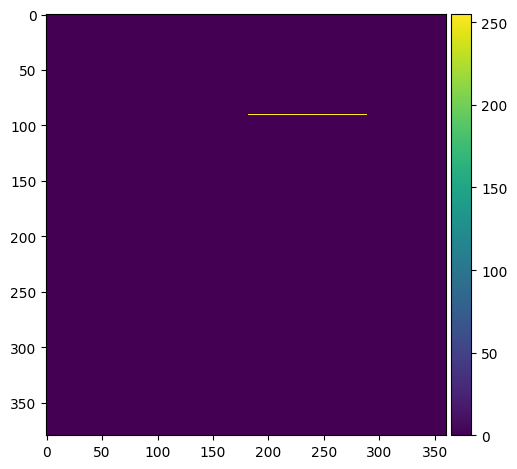

In [18]:
# WRITE YOUR CODE BELOW (DO NOT DELETE THIS LINE)

# apply threshold to scaled_image2
threshold = 209
my_result = np.where(scaled_image2 > threshold, 255, 0).astype(np.uint8)

imshow(image2_result)
plt.figure()
imshow(my_result)

# WRITE YOUR CODE ABOVE (DO NOT DELETE THIS LINE

## End of lab 07

See submission instructions above.